In [1]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter 
import warnings
import os
os.chdir('data')
#from colorsetup import colors, palette
#sns.set_palette(palette)

In [3]:
df = pd.read_pickle('churndata.pkl')
df

,id,months,offer,phone,multiple,internet_type,gb_mon,security,backup,protection,...,unlimited,contract,paperless,payment,monthly,total_revenue,satisfaction,churn_value,churn_score,cltv
0,8779-QRDMV,1,None,No,No,DSL,8,No,No,Yes,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,59.65,3,1,91,5433
1,7495-OOKFY,8,Offer E,Yes,Yes,Fiber Optic,17,No,Yes,No,...,Yes,Month-to-Month,Yes,Credit Card,80.65,1024.10,3,1,69,5302
2,1658-BYGOY,18,Offer D,Yes,Yes,Fiber Optic,52,No,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1910.88,2,1,81,3179
3,4598-XLKNJ,25,Offer C,Yes,No,Fiber Optic,12,No,Yes,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2995.07,2,1,88,5337
4,4846-WHAFZ,37,Offer C,Yes,Yes,Fiber Optic,14,No,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,3102.36,2,1,67,2793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,72,None,Yes,No,None,0,No,No,No,...,No,Two Year,Yes,Bank Withdrawal,21.15,3039.53,5,0,45,5306
7039,6840-RESVB,24,Offer C,Yes,Yes,Cable,24,Yes,No,Yes,...,Yes,One Year,Yes,Mailed Check,84.80,2807.47,3,0,59,2140
7040,2234-XADUH,72,None,Yes,Yes,Fiber Optic,59,No,Yes,Yes,...,Yes,One Year,Yes,Credit Card,103.20,9453.04,4,0,71,5560
7041,4801-JZAZL,11,None,No,No,DSL,17,Yes,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,319.21,4,0,59,2793


<AxesSubplot:xlabel='churn_value', ylabel='months'>

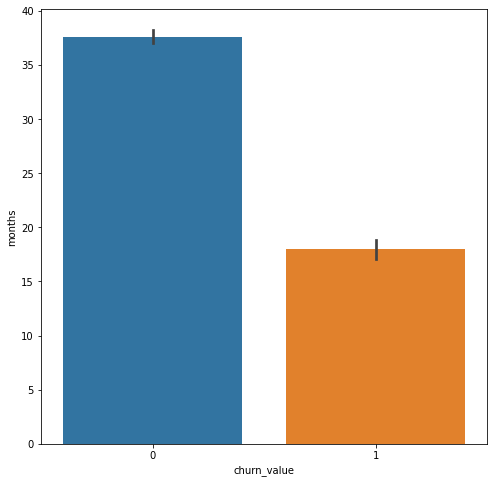

In [5]:
plt.figure(figsize=(8,8))
sns.barplot(data=df, x='churn_value', y='months')

Text(0, 0.5, 'Survival probability')

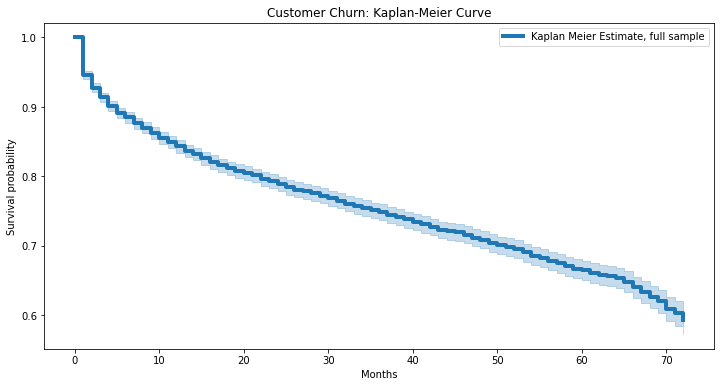

In [6]:
kmf = KaplanMeierFitter()

kmf.fit(df.months, df.churn_value, label = 'Kaplan Meier Estimate, full sample')

kmf.plot(linewidth=4, figsize=(12, 6))
plt.title('Customer Churn: Kaplan-Meier Curve')
plt.xlabel('Months')
plt.ylabel('Survival probability')

churn_value
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: months, dtype: object

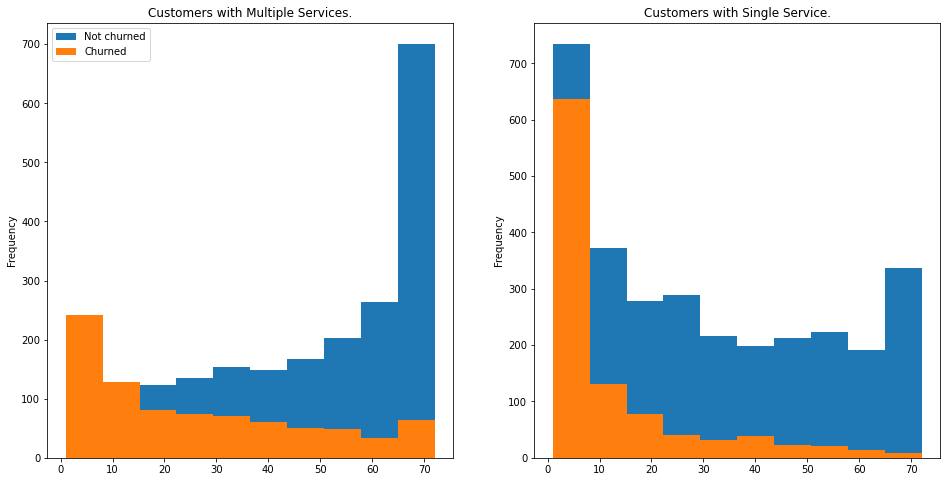

In [7]:
# Let's look at the 'multiple services variable'
df1 = df[df.multiple=='Yes']
df2 = df[df.multiple=='No']
fig, ax = plt.subplots(1,2, figsize=(16,8))
df1.groupby('churn_value')['months'].plot(kind='hist', ax=ax[0], title='Customers with Multiple Services.')
ax[0].legend(labels=['Not churned', 'Churned'])
df2.groupby('churn_value')['months'].plot(kind='hist', ax=ax[1], title='Customers with Single Service.')

Text(0, 0.5, 'Survival probability')

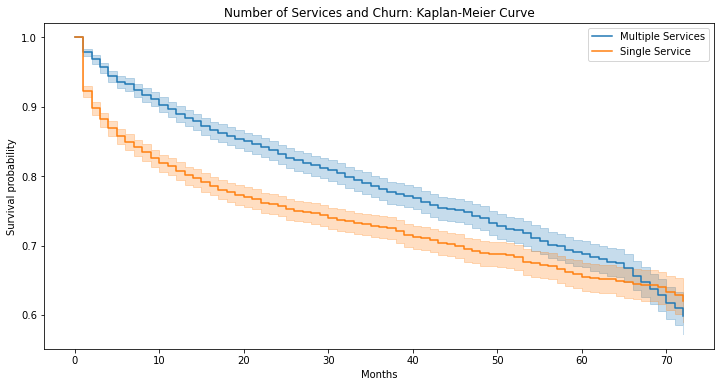

In [8]:
kmf.fit(df1.months, df1.churn_value)
kmf.plot(label='Multiple Services', figsize=(12, 6))
kmf.fit(df2.months, df2.churn_value)
kmf.plot(label='Single Service')
plt.title('Number of Services and Churn: Kaplan-Meier Curve')
plt.xlabel('Months')
plt.ylabel('Survival probability')

In [9]:
# Setting up the data
dfu = df[['multiple', 'churn_value']]
dfd = pd.get_dummies(dfu, drop_first=True)
dfd['months'] = df.months
dfd.rename(columns={'multiple_Yes':'Multiple Services'}, inplace=True)

In [11]:
dfd

,churn_value,Multiple Services,months
0,1,0,1
1,1,1,8
2,1,1,18
3,1,0,25
4,1,1,37
...,...,...,...
7038,0,0,72
7039,0,1,24
7040,0,1,72
7041,0,0,11


In [12]:
cph = CoxPHFitter()
cph.fit(dfd, duration_col='months', event_col='churn_value')
cph.print_summary(style='ascii')

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'months'
                event col = 'churn_value'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -15641.90
         time fit was run = 2021-07-11 16:03:43 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
Multiple Services  -0.24       0.79       0.05            -0.33            -0.15                 0.72                 0.86

                      z      p   -log2(p)
covariate                                
Multiple Services -5.06 <0.005      21.18
---
Concordance = 0.55
Partial AIC = 31285.81
log-likelihood ratio test = 25.72 on 1 df
-log2(p) of ll-ratio test = 21.27



<AxesSubplot:xlabel='log(HR) (95% CI)'>

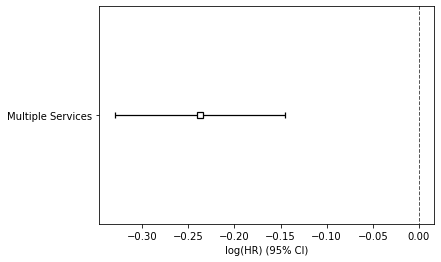

In [13]:
cph.plot()

In [16]:
# Including additional variables, data setup
dfu = df[['churn_value', 'satisfaction', 'security', 'backup', 'support']]
dfd = pd.get_dummies(dfu, drop_first=True)
dfd['months'] = df.months
#dfd.rename(columns={'multiple_Yes':'Multiple Services'}, inplace=True)
dfd.rename(columns={'backup_Yes':'Backup Service'}, inplace=True)
dfd.rename(columns={'security_Yes':'Security Service'}, inplace=True)
dfd.rename(columns={'support_Yes':'Support Service'}, inplace=True)

In [17]:
# Fitting Cox Proportional Model
cph = CoxPHFitter()
cph.fit(dfd, duration_col='months', event_col='churn_value')
cph.print_summary(style='ascii')

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'months'
                event col = 'churn_value'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -13308.14
         time fit was run = 2021-07-11 16:09:37 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
satisfaction      -1.30       0.27       0.02            -1.34            -1.25                 0.26                 0.29
Security Service  -1.09       0.34       0.07            -1.22            -0.96                 0.29                 0.38
Backup Service    -0.63       0.53       0.05            -0.73            -0.52                 0.48                 0.59
Support Service   -

<AxesSubplot:xlabel='log(HR) (95% CI)'>

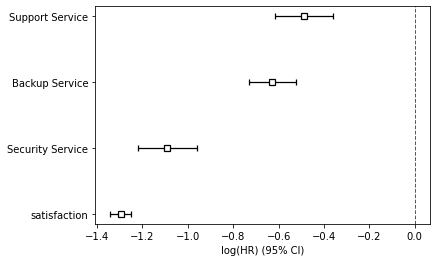

In [18]:
cph.plot()

<AxesSubplot:>

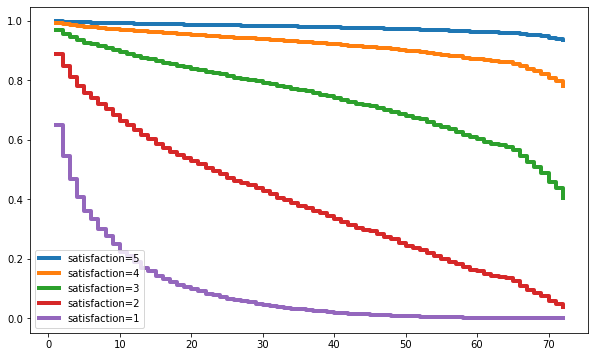

In [21]:
cph.plot_partial_effects_on_outcome('satisfaction', [5, 4, 3, 2, 1], plot_baseline=False, figsize=(10, 6), lw=4) 